# Project on International and NBA Player Statistics
By: Evan Keister

### 1. Abstract:
This project displays the most noticeable metrics in predicting which league a professional basketball player belongs to using machine learning algorithms that show the key differences and predictors of sucess between the different leagues. I worked with data from https://basketball.real.gm.com and extracted all relevant statistics. I focused on including advanced or highly specific statistics to observe the relationships with potential and current player performance. My assumption are that players (in either league international or NBA) shall be judged according to the basis that these leagues have similar competition and intensity of play. Applications of our machine learning algorithm research would show which International players and leagues have the most similiarity or disimliarty (which is relevant for scouts). I feel that KNN and Decision Trees/Random Forests will be very beneficial at determing the fit of a player; also, I will be able to predict which player statistics are most meaningul when predicting their beloning to a league.

In [31]:
df_nba

Player Team  GP   MPG   PPG  FGM   FGA    FG%  3PM  3PA  ...  \
0     Russell Westbrook  OKC  67  34.4  28.1  9.4  22.0  0.426  1.3  4.3  ...   
1          James Harden  HOU  81  36.8  27.4  8.0  18.1  0.440  2.6  6.9  ...   
2          LeBron James  CLE  69  36.1  25.3  9.0  18.5  0.488  1.7  4.9  ...   
3         Anthony Davis  NOP  68  36.1  24.4  9.4  17.6  0.535  0.0  0.2  ...   
4      DeMarcus Cousins  SAC  59  34.1  24.1  8.4  18.1  0.467  0.0  0.1  ...   
..                  ...  ...  ..   ...   ...  ...   ...    ...  ...  ...  ...   
135        De'Aaron Fox  SAC  58  35.1  25.2  9.1  19.1  0.477  1.8  5.5  ...   
136        LeBron James  LAL  45  33.4  25.0  9.4  18.3  0.513  2.3  6.3  ...   
137       Kawhi Leonard  LAC  52  34.1  24.8  8.9  17.5  0.512  1.9  4.9  ...   
138  Karl-Anthony Towns  MIN  50  33.8  24.8  8.5  17.5  0.486  2.4  6.3  ...   
139        Jaylen Brown  BOS  58  34.5  24.7  9.3  19.2  0.484  2.8  7.1  ...   

      RPG  APG  SPG  BPG  TOV   PF  Year  European Nationality  Height (cm)  \
0     7.3  8.6  2.1  0.2  4.4  2.7  2015                 False          191   
1     5.7  7.0  1.9  0.7  4.0  2.6  2015                 False          196   
2     6.0  7.4  1.6  0.7  3.9  2.0  2015                 False          203   
3    10.2  2.2  1.5  2.9  1.4  2.1  2015                 False          208   
4    12.7  3.6  1.5  1.7  4.3  4.1  2015                 False          211   
..    ...  ...  ...  ...  ...  ...   ...                   ...          ...   
135   3.5  7.2  1.5  0.5  3.0  2.9  2021                 False          191   
136   7.7  7.8  1.1  0.6  3.7  1.6  2021                 False          203   
137   6.5  5.2  1.6  0.4  2.0  1.6  2021                 False          201   
138  10.6  4.5  0.8  1.1  3.2  3.7  2021                  True          213   
139   6.0  3.4  1.2  0.6  2.7  2.9  2021                 False          198   

     Weight(lbs)  
0             91  
1            100  
2            113  
3            115  
4            122  
..           ...  
135           84  
136          113  
137          102  
138          113  
139          100  

[140 rows x 26 columns]

# Direct links to sections of machine learning applications and discussion of results:
- [Results of Machine Learning Algorithms](#machine_learning)
- [Discussion of Results](#discussion)

## 2. Introduction

### Central Motivation:
International NBA players are drafted yearly into the NBA from several different leagues, and it's an important task to know what differences in statistics mean between these leagues, especially when scouting for potential draft picks. This project aims to analyze the data from International and NBA Basketball Leagues in order to understand what qualities are most promising across different professional basketball leagues. This analysis could indicate valuable international leagues to scout for the NBA (the best professional basketball league). I also want to see how the various International leagues differ in terms of statistics between players. These differences could be due to different forms of play style and the degree of refereeing of the games. I wish to determine how players would be predicted to perform in the future and how they would perform in different leagues.

### Two Key Questions to be explored:
1. What statistics of players between the International and NBA leagues are most similar or distinctive?

2. How well will our models be able to predict the placement of a player into their respective leauge (i.e. how similar or disimilar are the general statistics of players in the different leagues).

I will scape the data from Real GM https://basketball.realgm.com/international/league/1/Euroleague/stats/2023/Averages/Qualified/All/points/All/desc/1 to get the data for the top 20 statistically ranked players from 2015-2022 (from 7 different leagues).

I will be appending the data frames together to form a single larger data frame. In previous prcoessing, the data frames have all been made alike, so this step is fairly straighforward.

Some values of extra data (ex. weight) were not available when clicking on the player page. To handle this, we just
inserted np.nan. Later on, we could fill these values with an algorithmic prediction of what the value would be
within reason.

Also, some players years did not have infromation for data on leagues. In this case, the data was not included (i.e. dropped). But, there is still a general even distribution between players from different leagues.

Further data normalization was made when it came time to perform the machine learning algorithms.

# 3. Data Description

## Overview of Data Processing Pipeline:

### Part 1: Data Pipeline for Obtaining Data on International Players
Obtaining the Data for the Top 20 International players from 2015-2022 from international basketball leagues. These leagues include: Euroleague, Eurocup, Hungarian-NBIA, Lithuanian-NKL, Chinese-CBA, Australian-NBL. I chose a variety of leagues to gain data from that are in different geolocations.
I will scape the data from Real GM https://basketball.realgm.com/international/league/1/Euroleague/stats/2023/Averages/Qualified/All/points/All/desc/1 to get the data for the top statistically ranked players from 2015-2022.

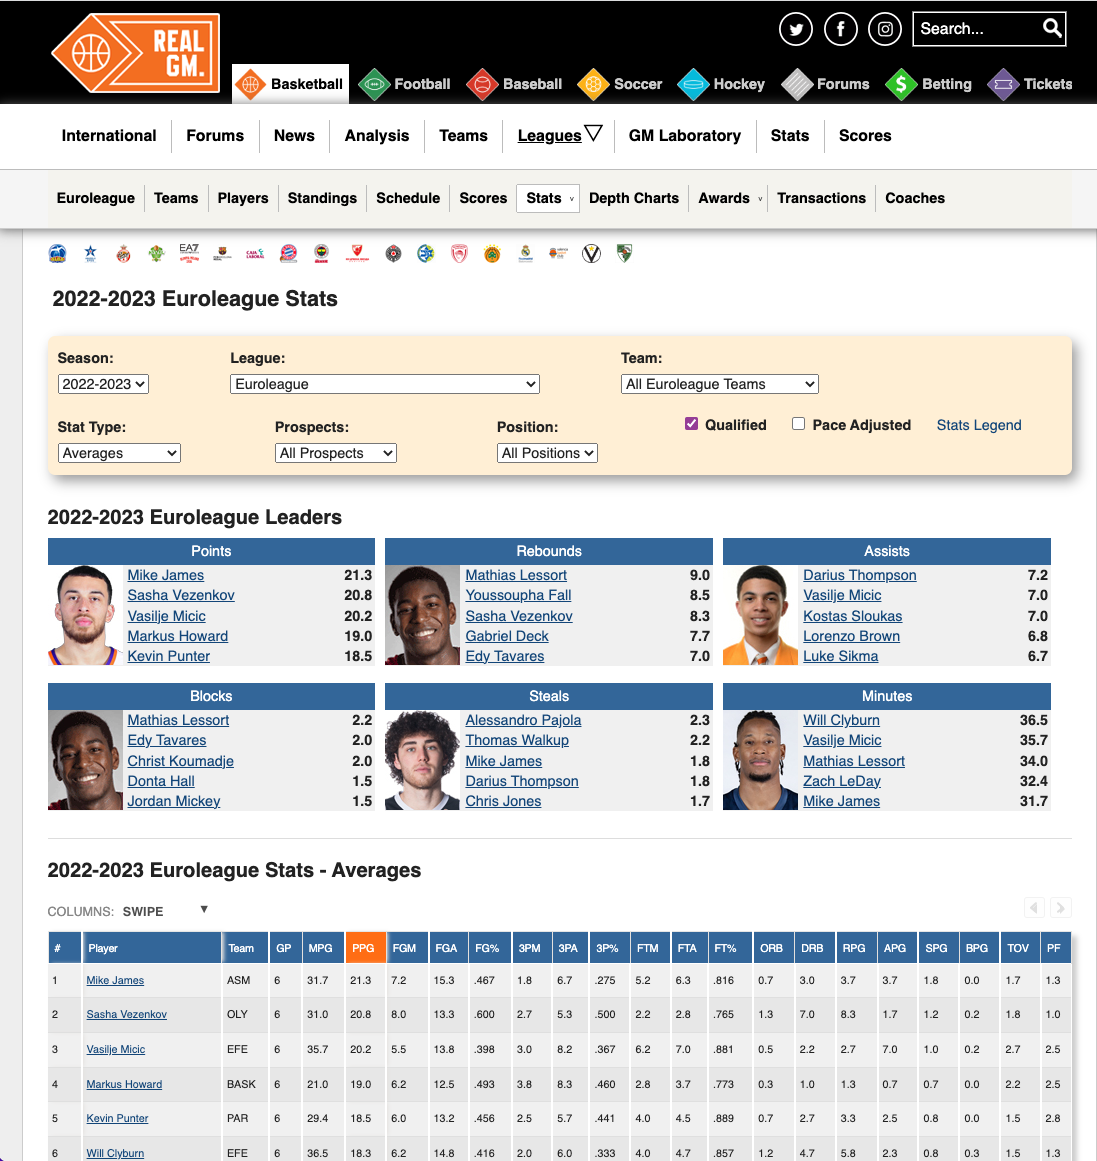

For each player these metrics were also obtained:
- Nationality
- Height
- Weight
- League

Methods to be used for accomplishing these tasks.
### For Web Scraping:
- `format_url_euro()`
    - get the url to the page for a supplied year
- `build_year_list()`
    - Creates a dummy list of the supplied year repeated as many times as demanded for.
- `generate_other_info()`
    - Gets extra information about Euroleague plauyers including their height, weight, and nationality.
- `build_df_generic()`
    - creates the dataframe to be used for data analysis upon the top internation players (the players are ranked by their PPG). Accepts a function that builds the url for either an internation league data or NBA data
- `generate_league_list()`
    - creates a generic list of the supplied league argument

### Part 2: Data Pipeline for Obtaing Data for NBA Players
The same website, Real GM (Basketball), will be used to get the data of the top NBA players over the past 10 year

I will essentially use the same methods, just the format of the url needed for the website was different for the NBA data. This is the only different method that we will pass into build_df_generic:
- `format_url_nba()`
    - get the url of the website for NBA data based on the supplied year
  

### Part 3: Merging Data and Cleaning
I will be appending the data frames together to form a single larger data frame. In previous prcoessing, the data frames have all been made alike, so this step is fairly straighforward.

Some values of extra data (ex. weight) were not available when clicking on the player page. To handle this, I just
inserted np.nan. Later on, I could fill these values with an algorithmic prediction of what the values would be
within reason.

Also, some player's years did not have information for data on leagues. In this case, the data was not included (i.e. dropped). But, there is still a general even distribution between players from different leagues.

### Methods to be Used for Data Cleaning:
- `convert_data_to_numeric()`
    - converts all data to numeric types (from str) if possible, some types of data are not meant to be converted to numeric like there name, team, nationality, and league.
- `replace()`
    - parses numerical data to float if it is capable, if not returns np.nan
- `handle_weight()`
    - Handles issues with capturing the weight of some players were this was not an attirubute on their respective page.

## 3. Collection, Cleaning and Merging of the Collected Data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import json
from datetime import datetime
import pandas as pd
import plotly
import plotly.express as px
from bs4 import BeautifulSoup
import numpy as np

## Part 1: - International Player Data:

In [2]:
def format_url_euro(year, league_name, league_id):
    """ From the Euro League Website, generate the url for the page for a given year
    
    Args:
        year (int): desried year of information 
    
    Returns:
        url (str): the url link to the website formatted with the supplied year
    
    """
        
    url = f'https://basketball.realgm.com/international/league/{league_id}/{league_name}/stats/{year}/Averages/Qualified/All/points/All/desc/1'
    
    return url

In [3]:
def build_year_list(num_players, year):
    """Creates a list of years as long as the desired number of players that one wished to get the data for.
    
    Args:
        num_players (int): the desired number of players that one is trying to abstract form the dataframe
        year (int): the year to be duplicated
    
    Returns:
        year_list (list): 
    """
    
    year_list = []
    for idx in range(0, num_players):
            year_list.append(int(year))
            
    return year_list

In [4]:
def handle_weight(data):
    """ Gets the weight data from web scrapping
    
    Args:
        data (str): text data from the website to get extra information for each player
    
    Returns:
        weight_lbs (str) or np.nan: obtained weight site has it, or null value if no weight attribute is present
    
    """
    try:
        temp_data = data.split('Weight:')[1].strip()
        weight = temp_data.split("\n")[0]
        weight_lbs = weight.split("(")[1].split(")")[0].split('kg')[0]
        return weight_lbs
    except:
        return np.nan
    

In [5]:
def generate_other_info(url, num_players):
    """Generates the height, weight, and nationality of all the players on each Euroleague team.
    
    Args:
        df_euro (DataFrame): input data frame to have added extra infromation for each player
        url (str): the url of which to obtain the extra infromation from for each player
    
    Returns:
        df_euro (DataFrae): resutlting dataframe with the addition of the extra characteristics
    
    """
    
    df_sample = pd.DataFrame()
    
    # Get Each Player's Nationality, Height, and Weight
    nationality_list = []
    height_list = []
    weight_list = []
    str_html = requests.get(url).text
    soup = BeautifulSoup(str_html)

    data_list = soup.find_all('td', class_='nowrap')

    for idx in range(0, num_players):
        temp_list = str(data_list[idx]).split(' ')
        temp_href = temp_list[2].split('href="')[1]
        final_href = temp_href.split('"')[0]
        final_href

        start_url = 'https://basketball.realgm.com' + final_href
        str_html = requests.get(start_url).text
        soup = BeautifulSoup(str_html)
        data = soup.find_all(class_='half-column-left')[0].text

        # Get Nationality Info
        temp_data = data.split('Nationality:')[1].strip()
        nationality = temp_data.split("\n")[0]
        nationality_list.append(nationality)

        # Get Height Info
        temp_data = data.split('Height:')[1].strip()
        height = temp_data.split("\n")[0]
        cm_height = height.split('(')[1].split(")")[0].split('cm')[0]
        height_list.append(cm_height)

        # Get Weight Info
        weight_lbs = handle_weight(data)
        weight_list.append(weight_lbs)


        european_born_list = []
        for idx in range(len(nationality_list)):
            if nationality_list[idx] == 'United States':
                european_born_list.append(False)
            else:
                european_born_list.append(True) 
    
    return pd.Series(european_born_list), pd.Series(height_list), pd.Series(weight_list)



In [6]:
def build_generic_df(start_year, end_year, num_players, url_getter, league_name, league_id):
    """Creates the dataframe of data for NBA players between the supplied dates. Gets the top number of players
    ranked by points for each year
    
    Args:
        start_year (int): the year to begin collecting data from
        end_year (int): the last year to collect data from
        num_players (int): the number of players that you would want to abstract form the dataframe
    
    Returns:
        df_nba (DataFrame): dataframe of infomration relating to the best 15 players for each year within the given
        time frame
    """
    
    df_nba = pd.DataFrame()
    
    for year in range(start_year, end_year):
        print(year)
        year_list = build_year_list(num_players, year)

        url = url_getter(year, league_name, league_id)
        try:
            df_temp = pd.read_html(url)[0]
            df_temp = df_temp.drop(columns={'#'})
        except:
            continue
            
        df_temp_2 = pd.DataFrame()

        for idx in range(0, num_players):
            df_temp_2 = df_temp_2.append(df_temp.iloc[idx, :])

        df_temp_2['Year'] = pd.Series(year_list)
        
        # Make call to helper method
        s_1, s_2, s_3 = generate_other_info(url, num_players)
        
        df_temp_2['European Nationality'] = s_1
        df_temp_2['Height (cm)'] = s_2
        df_temp_2['Weight(lbs)'] = s_3
        
        df_nba = df_nba.append(df_temp_2, ignore_index=True)
        
    return df_nba

In [7]:
def generate_league_list(league, df):
    """Generates a list of the League type to be appended to the dataframe
    
    Args:
        league (str): name of the leauge that the player is from
    
    Returns:
        league_list (list): list of the league duplicated to fit the dataframe
    
    """
    league_list = []
    
    for idx in range(len(df)):
        league_list.append(league)
    
    return league_list

In [8]:
df_international = pd.DataFrame()

league_list = ['Euroleague', 'Eurocup', 'Hungarian-NBIA', 'Lithuanian-NKL', 'Chinese-CBA', 'Australian-NBL']
league_ids = [1, 2, 28, 118, 40, 5]

for idx in range(0, len(league_list)):
    league_name = league_list[idx]
    league_id = league_ids[idx]
    
    temp_df = build_generic_df(2015, 2022, 20, format_url_euro, league_name, league_id)
    
    temp_df['League'] = pd.Series(generate_league_list(league_name, temp_df))   
    
    df_international = df_international.append(temp_df, ignore_index=True)
    
    
df_international    

2015
2016
2017
2018
2019
2020
2021
2015
2016
2017
2018
2019
2020
2021
2015
2016
2017
2018
2019
2020
2021
2015
2016
2017
2018
2019
2020
2021
2015
2016
2017
2018
2019
2020
2021
2015
2016
2017
2018
2019
2020
2021


Player Team  GP   MPG   PPG  FGM   FGA    FG%  3PM  3PA  ...  \
0    Taylor Rochestie  NIZ  21  30.0  18.9  6.4  12.6  0.511  2.5  5.0  ...   
1    Andrew Goudelock  FEN  29  29.9  17.0  6.7  13.0  0.511  2.4  5.3  ...   
2      Keith Langford  UNI  10  29.2  16.7  6.2  12.6  0.492  1.2  3.8  ...   
3    Boban Marjanovic  ZVE  24  27.3  16.6  6.2  10.0  0.623  0.0  0.0  ...   
4     Bojan Dubljevic  VAL   8  22.9  15.5  5.6  11.0  0.511  1.5  3.5  ...   
..                ...  ...  ..   ...   ...  ...   ...    ...  ...  ...  ...   
775  Dejan Vasiljevic  SYD  21  27.7  15.4  5.6  12.1  0.465  2.3  5.6  ...   
776  Todd Blanchfield  PER  41  29.5  15.2  5.0  11.8  0.422  2.5  7.2  ...   
777     Levi Randolph  NZB  15  30.0  14.8  5.7  13.1  0.431  1.9  5.6  ...   
778      Keifer Sykes  SEM  27  27.1  14.4  5.5  13.2  0.416  1.9  5.1  ...   
779   Lamar Patterson  BRI  17  28.3  14.2  5.2  12.6  0.414  1.5  4.4  ...   

     APG  SPG  BPG  TOV   PF  Year  European Nationality  Height (cm)  \
0    5.7  0.6  0.0  2.2  1.9  2015                  True          185   
1    2.1  0.7  0.1  1.4  1.8  2015                 False          191   
2    2.3  1.1  0.2  2.2  1.9  2015                 False          193   
3    1.0  0.4  0.8  1.4  1.5  2015                  True          224   
4    0.9  0.9  0.3  1.0  2.3  2015                  True          206   
..   ...  ...  ...  ...  ...   ...                   ...          ...   
775  1.8  0.5  0.1  0.8  1.4  2021                  True          191   
776  1.6  0.9  0.2  1.3  1.5  2021                  True          198   
777  1.3  1.1  0.1  1.3  2.7  2021                 False          196   
778  5.0  0.8  0.1  2.1  2.3  2021                 False          183   
779  2.9  1.5  0.0  2.1  2.8  2021                 False          196   

     Weight(lbs)          League  
0             88      Euroleague  
1             91      Euroleague  
2             92      Euroleague  
3            132      Euroleague  
4            110      Euroleague  
..           ...             ...  
775           86  Australian-NBL  
776           94  Australian-NBL  
777           94  Australian-NBL  
778           82  Australian-NBL  
779          102  Australian-NBL  

[780 rows x 27 columns]

## Part 2 Methods: - NBA Player Data:

In [9]:
def format_url_nba(year, league_name, league_id):
    """ Gets the url to scrape NBA data from a specified year
    
    Args:
        year (int): desried year of information 
    
    Returns:
        url (str): the url link to the website formatted with the supplied year
    """
    url = f'https://basketball.realgm.com/nba/stats/{year}/Averages/Qualified/points/All/desc/1/Regular_Season'
    return url


In [10]:
def build_nba_df(start_year, end_year, num_players, url_getter, league_name, league_id):
    """Creates the dataframe of data for NBA players between the supplied dates. Gets the top number of players
    ranked by points for each year
    
    Args:
        start_year (int): the year to begin collecting data from
        end_year (int): the last year to collect data from
        num_players (int): the number of players that you would want to abstract form the dataframe
    
    Returns:
        df_nba (DataFrame): dataframe of infomration relating to the best 15 players for each year within the given
        time frame
    """
    
    df_nba = pd.DataFrame()
    
    for year in range(start_year, end_year):
        print(year)
        year_list = build_year_list(num_players, year)

        url = url_getter(year, league_name, league_id)
        try:
            df_temp = pd.read_html(url)[10]
            df_temp = df_temp.drop(columns={'#'})
        except:
            continue
            
        df_temp_2 = pd.DataFrame()

        for idx in range(0, num_players):
            df_temp_2 = df_temp_2.append(df_temp.iloc[idx, :])

        df_temp_2['Year'] = pd.Series(year_list)
        
        # Make call to helper method
        s_1, s_2, s_3 = generate_other_info(url, num_players)
        
        df_temp_2['European Nationality'] = s_1
        df_temp_2['Height (cm)'] = s_2
        df_temp_2['Weight(lbs)'] = s_3
        
        df_nba = df_nba.append(df_temp_2, ignore_index=True)
        
    return df_nba

In [11]:
df_nba = build_nba_df(2015, 2022, 20, format_url_nba, 'NBA', '1')

2015
2016
2017
2018
2019
2020
2021


In [12]:
df_nba

Player Team  GP   MPG   PPG  FGM   FGA    FG%  3PM  3PA  ...  \
0     Russell Westbrook  OKC  67  34.4  28.1  9.4  22.0  0.426  1.3  4.3  ...   
1          James Harden  HOU  81  36.8  27.4  8.0  18.1  0.440  2.6  6.9  ...   
2          LeBron James  CLE  69  36.1  25.3  9.0  18.5  0.488  1.7  4.9  ...   
3         Anthony Davis  NOP  68  36.1  24.4  9.4  17.6  0.535  0.0  0.2  ...   
4      DeMarcus Cousins  SAC  59  34.1  24.1  8.4  18.1  0.467  0.0  0.1  ...   
..                  ...  ...  ..   ...   ...  ...   ...    ...  ...  ...  ...   
135        De'Aaron Fox  SAC  58  35.1  25.2  9.1  19.1  0.477  1.8  5.5  ...   
136        LeBron James  LAL  45  33.4  25.0  9.4  18.3  0.513  2.3  6.3  ...   
137       Kawhi Leonard  LAC  52  34.1  24.8  8.9  17.5  0.512  1.9  4.9  ...   
138  Karl-Anthony Towns  MIN  50  33.8  24.8  8.5  17.5  0.486  2.4  6.3  ...   
139        Jaylen Brown  BOS  58  34.5  24.7  9.3  19.2  0.484  2.8  7.1  ...   

      RPG  APG  SPG  BPG  TOV   PF  Year  European Nationality  Height (cm)  \
0     7.3  8.6  2.1  0.2  4.4  2.7  2015                 False          191   
1     5.7  7.0  1.9  0.7  4.0  2.6  2015                 False          196   
2     6.0  7.4  1.6  0.7  3.9  2.0  2015                 False          203   
3    10.2  2.2  1.5  2.9  1.4  2.1  2015                 False          208   
4    12.7  3.6  1.5  1.7  4.3  4.1  2015                 False          211   
..    ...  ...  ...  ...  ...  ...   ...                   ...          ...   
135   3.5  7.2  1.5  0.5  3.0  2.9  2021                 False          191   
136   7.7  7.8  1.1  0.6  3.7  1.6  2021                 False          203   
137   6.5  5.2  1.6  0.4  2.0  1.6  2021                 False          201   
138  10.6  4.5  0.8  1.1  3.2  3.7  2021                  True          213   
139   6.0  3.4  1.2  0.6  2.7  2.9  2021                 False          198   

     Weight(lbs)  
0             91  
1            100  
2            113  
3            115  
4            122  
..           ...  
135           84  
136          113  
137          102  
138          113  
139          100  

[140 rows x 26 columns]

In [13]:
df_nba['League'] = pd.Series(generate_league_list('NBA', df_nba))   

df_nba

Player Team  GP   MPG   PPG  FGM   FGA    FG%  3PM  3PA  ...  \
0     Russell Westbrook  OKC  67  34.4  28.1  9.4  22.0  0.426  1.3  4.3  ...   
1          James Harden  HOU  81  36.8  27.4  8.0  18.1  0.440  2.6  6.9  ...   
2          LeBron James  CLE  69  36.1  25.3  9.0  18.5  0.488  1.7  4.9  ...   
3         Anthony Davis  NOP  68  36.1  24.4  9.4  17.6  0.535  0.0  0.2  ...   
4      DeMarcus Cousins  SAC  59  34.1  24.1  8.4  18.1  0.467  0.0  0.1  ...   
..                  ...  ...  ..   ...   ...  ...   ...    ...  ...  ...  ...   
135        De'Aaron Fox  SAC  58  35.1  25.2  9.1  19.1  0.477  1.8  5.5  ...   
136        LeBron James  LAL  45  33.4  25.0  9.4  18.3  0.513  2.3  6.3  ...   
137       Kawhi Leonard  LAC  52  34.1  24.8  8.9  17.5  0.512  1.9  4.9  ...   
138  Karl-Anthony Towns  MIN  50  33.8  24.8  8.5  17.5  0.486  2.4  6.3  ...   
139        Jaylen Brown  BOS  58  34.5  24.7  9.3  19.2  0.484  2.8  7.1  ...   

     APG  SPG  BPG  TOV   PF  Year  European Nationality  Height (cm)  \
0    8.6  2.1  0.2  4.4  2.7  2015                 False          191   
1    7.0  1.9  0.7  4.0  2.6  2015                 False          196   
2    7.4  1.6  0.7  3.9  2.0  2015                 False          203   
3    2.2  1.5  2.9  1.4  2.1  2015                 False          208   
4    3.6  1.5  1.7  4.3  4.1  2015                 False          211   
..   ...  ...  ...  ...  ...   ...                   ...          ...   
135  7.2  1.5  0.5  3.0  2.9  2021                 False          191   
136  7.8  1.1  0.6  3.7  1.6  2021                 False          203   
137  5.2  1.6  0.4  2.0  1.6  2021                 False          201   
138  4.5  0.8  1.1  3.2  3.7  2021                  True          213   
139  3.4  1.2  0.6  2.7  2.9  2021                 False          198   

     Weight(lbs)  League  
0             91     NBA  
1            100     NBA  
2            113     NBA  
3            115     NBA  
4            122     NBA  
..           ...     ...  
135           84     NBA  
136          113     NBA  
137          102     NBA  
138          113     NBA  
139          100     NBA  

[140 rows x 27 columns]

### Merging the Data and Data Cleaning

In [14]:
df_final = pd.concat([df_international, df_nba], ignore_index=True)

df_final

Player Team  GP   MPG   PPG  FGM   FGA    FG%  3PM  3PA  ...  \
0      Taylor Rochestie  NIZ  21  30.0  18.9  6.4  12.6  0.511  2.5  5.0  ...   
1      Andrew Goudelock  FEN  29  29.9  17.0  6.7  13.0  0.511  2.4  5.3  ...   
2        Keith Langford  UNI  10  29.2  16.7  6.2  12.6  0.492  1.2  3.8  ...   
3      Boban Marjanovic  ZVE  24  27.3  16.6  6.2  10.0  0.623  0.0  0.0  ...   
4       Bojan Dubljevic  VAL   8  22.9  15.5  5.6  11.0  0.511  1.5  3.5  ...   
..                  ...  ...  ..   ...   ...  ...   ...    ...  ...  ...  ...   
915        De'Aaron Fox  SAC  58  35.1  25.2  9.1  19.1  0.477  1.8  5.5  ...   
916        LeBron James  LAL  45  33.4  25.0  9.4  18.3  0.513  2.3  6.3  ...   
917       Kawhi Leonard  LAC  52  34.1  24.8  8.9  17.5  0.512  1.9  4.9  ...   
918  Karl-Anthony Towns  MIN  50  33.8  24.8  8.5  17.5  0.486  2.4  6.3  ...   
919        Jaylen Brown  BOS  58  34.5  24.7  9.3  19.2  0.484  2.8  7.1  ...   

     APG  SPG  BPG  TOV   PF  Year  European Nationality  Height (cm)  \
0    5.7  0.6  0.0  2.2  1.9  2015                  True          185   
1    2.1  0.7  0.1  1.4  1.8  2015                 False          191   
2    2.3  1.1  0.2  2.2  1.9  2015                 False          193   
3    1.0  0.4  0.8  1.4  1.5  2015                  True          224   
4    0.9  0.9  0.3  1.0  2.3  2015                  True          206   
..   ...  ...  ...  ...  ...   ...                   ...          ...   
915  7.2  1.5  0.5  3.0  2.9  2021                 False          191   
916  7.8  1.1  0.6  3.7  1.6  2021                 False          203   
917  5.2  1.6  0.4  2.0  1.6  2021                 False          201   
918  4.5  0.8  1.1  3.2  3.7  2021                  True          213   
919  3.4  1.2  0.6  2.7  2.9  2021                 False          198   

     Weight(lbs)      League  
0             88  Euroleague  
1             91  Euroleague  
2             92  Euroleague  
3            132  Euroleague  
4            110  Euroleague  
..           ...         ...  
915           84         NBA  
916          113         NBA  
917          102         NBA  
918          113         NBA  
919          100         NBA  

[920 rows x 27 columns]

In [15]:
def replace(i):
    """Helper method that parses input to floats or nan
    
    Args:
        i (str or float or other numerical): value to be parsed
        
    Returns:
        float(i) or np.nan: will return float if can be parsed, nan is cannot
    """
    try:
        float(i)
        return float(i)
    except:
           return np.nan

In [16]:
def convert_data_to_numeric(df):
    """Converts the numerical types in the dataframe from strings to floats and integers
    
    Args:
        df (DataFrame): dataframe on which to be operated upon
        
    Returns:
        df (DataFrame): dataframe with converted values from strings to numerical types
    
    """
    
    for column in df.columns:
        if (column == 'Player') | (column == 'Team') | (column == 'European Nationality') | (column == 'League'):
            pass
        else:
            s_temp = df[column].map(replace)
            df[column] = s_temp
    
    return df

In [17]:
df_final = convert_data_to_numeric(df_final)

## Two visualizations (graphs/plots) from the data to help understand the questions of interest:

### Plot 1: Plots Field Goal Percentage vs. Points Per Game for all data. 
- Points are color by the player's respective league. 
- The graph shows the differences in PPG between leagues. This can be influenced by play style and the degree of refereeing of the games. It also shows that there isn't much corelatoin between hgiher point scorers and shooting percentages; althouhg, players with lower shooting percentages ten to have slightly less point per game. 
- The higher percentage outliers can be explained by taller players who normally shoot high percentage shots.

In [18]:
df_final = pd.read_csv('data_final.csv', index_col='Player')

In [19]:
import plotly.express as px

px.scatter(df_final, 'FG%', 'PPG', color="League", title='FG% vs. PPG for players from various leagues')

### Plot 2: Showing the comparison between Assists Per Game (APG) between the different leagues.
- The y-axis represents the total accumulation of the assist averages. Higher peaks mean that within a given league, players tend to assist other players more (i.e. are less selfish and pass more).

In [20]:
px.bar(df_final, 'League', 'APG', color='League', title='Assists Per Game totals for all accumulated data for players in a different professional leagues')

In [21]:
# df_final.to_csv('data_final.csv')
# This was what we preivouslt used to store the results into the csv file

## 4. Machine Learning Methods

# Discussion of what machine learning tools will be used and the relevant assumptions required to apply each.

Our assumption is that players (in either league international or nba) shall be judged according to the basis that these leagues have similar competition and intensity of play.

A few algorithms and approaches can be used in order to determine the talent of international players in comparison to NBA players, and predict their NBA readiness. Similarly, I could determine how international players and NBA players will perform in different leagues than they are currently playing in.

- `K-Nearest Neighbors` can be used to tell which international playera are most similar to NBA players. The PPG and other various statistics can vary from league to league based upon the different styles of gameplay. To handle this, I will normalize the data for all of the players. This task will be accomplished by using a classifier and training it on subsets of all the data. I can also use the determined similarities between the players to show which International Leagues have similar players to one another, or to the NBA.
    - Seperate players into different leagues
    - Determine which key metrics correlate to necessary stats that Internatinoal Players should show in order to be good prospects for the NBA.
    - Predict the statistics of an International or NBA player (y-value) and show the stats for that player.
    - I could further this by predicting what the stats of a player would be in a certain league. This could be accomplished by creating classifiers specific to a certain league.
    - Furthermore, analysis based upon nationality or a certain position could be evaluated.
    - Determine model accuracy. This model could be beneficial in the future for recruiters.
    
- i can use `regression analysis` to spot trends between International and NBA players. I could use these trends to predict future player performance, predicts how players would perform/fit in other leagues, and how close the talent/statistics of the players within a given league are.

- Additionally, I can determine how well a player would fit into a certain league using `Random Forsests` (based on decision tree algorithms). In order to accompllish this task I plan to use a classifier to produce the most meaningful statistics of the dataset for each league. Determing factors of fit could be for example wether or not a player is of international origin.
    - Create a list of highly ranked players in each league
    - Determine the most important statistics for each player to be successful in a given league
    - Build a RandomForest classifier based on the statistics of the different player performances in the leagues.
    - Pass in International and NBA players to the classifier to determine the characteristics that are most promosing for a player to be successful in a given league.
    
Applications of our machine learning algorithm research would show us which International players and leagues have the most promising players for NBA scouts. We feel that KNN and Regression Analysis will be very beneficial at determing the fit of a player. Also, we will be able to predict which player statistics of a given leauge are most crucial to player performance by using our Random Forests Classifier.

### Why the chosen methods should be viable solutions to draw conclusions from:
- We are determining the statistical differences between the top players in various professional basketball leagues. KNN and Decision Trees/Random Forests will us to predict the accuracy of each respective classifier at predicting which league a player belong to. Additionally, Random Forests will allow us to determine the most meaningful statistics that allow for predictions to be made.

<a id='machine_learning'></a>
## 5. Results:
### Applications of the Machine Learning methods:

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
import json
from datetime import datetime
import pandas as pd
import plotly
import plotly.express as px
from bs4 import BeautifulSoup
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [23]:
df_final = pd.read_csv('data_final.csv', index_col='Player')

In [24]:
df_final.head()

Unnamed: 0 Team    GP   MPG   PPG  FGM   FGA    FG%  3PM  \
Player                                                                       
Taylor Rochestie           0  NIZ  21.0  30.0  18.9  6.4  12.6  0.511  2.5   
Andrew Goudelock           1  FEN  29.0  29.9  17.0  6.7  13.0  0.511  2.4   
Keith Langford             2  UNI  10.0  29.2  16.7  6.2  12.6  0.492  1.2   
Boban Marjanovic           3  ZVE  24.0  27.3  16.6  6.2  10.0  0.623  0.0   
Bojan Dubljevic            4  VAL   8.0  22.9  15.5  5.6  11.0  0.511  1.5   

                  3PA  ...  APG  SPG  BPG  TOV   PF    Year  \
Player                 ...                                    
Taylor Rochestie  5.0  ...  5.7  0.6  0.0  2.2  1.9  2015.0   
Andrew Goudelock  5.3  ...  2.1  0.7  0.1  1.4  1.8  2015.0   
Keith Langford    3.8  ...  2.3  1.1  0.2  2.2  1.9  2015.0   
Boban Marjanovic  0.0  ...  1.0  0.4  0.8  1.4  1.5  2015.0   
Bojan Dubljevic   3.5  ...  0.9  0.9  0.3  1.0  2.3  2015.0   

                  European Nationality  Height (cm)  Weight(lbs)      League  
Player                                                                        
Taylor Rochestie                  True        185.0         88.0  Euroleague  
Andrew Goudelock                 False        191.0         91.0  Euroleague  
Keith Langford                   False        193.0         92.0  Euroleague  
Boban Marjanovic                  True        224.0        132.0  Euroleague  
Bojan Dubljevic                   True        206.0        110.0  Euroleague  

[5 rows x 27 columns]

# Decision Trees/Random Forests:
- Goal: find meaningul attributes that distinguish between the featues.
- Find outliers that can be removed bofore KNN is performed.
- Determine classifier performance (accuracy).

In [25]:
# Single player data point was eliminated in order to perform the machine learning algorithms (because it had an NaN value).
print(len(df_final))
# Eliminate player with NA data
df_final = df_final.dropna()
print(len(df_final))

920
919


 # First, Build a Decision Tree Classifier:
 - GP (games played) was removed from the x feature list becasue it was a heavy outlier on the results for when feature importance was determined. This is not a very meaningful statistic since the total number of games played for a team during a season is vaslty different between the different leagues.
- We also decidded to remove the MPG (minutes per game) attribute because the overall length of games varies slighly between the different leagues. This statistics might display some meaningful insight into usage rates of players, but more advanced handling of the data or statistics would be needed.

In [26]:
def get_cv_acc_dt(x, y_true, max_depth, n_splits=10):
    """gets the cross validation accuracy of Decistion Tree on the dataset using the supplied max_depth
    
    Args:
        x (array): an array/list of all the values that are in the x_feat_list in the dataframe at every row
        y_ture (array): an array/list of all the values of the drive type in the data frame
        k (int): the k value to be using for the KNeighborsClassifier object - determines how to calculate the
            k-nearest neighbors of each point in the data set
        n_splits (int): default value is 10, supplied to the StratifiedKFold object that folds the data set
    
    Returns:
        score (int): the computed accuracy of the accuracy of KNN applied to the data set
    """
    
    # build decision tree classifier
    dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

    # fit data
    dec_tree_clf = dec_tree_clf.fit(x, y_true)

    # initialize k fold
    skfold = StratifiedKFold(n_splits=n_splits)

    # initialize decision tree
    dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

    # initialize y_pred, stores predictions of y
    y_pred = np.empty_like(y_true)

    for train_idx, test_idx in skfold.split(x, y_true):
        # get training data
        x_train = x[train_idx, :]
        y_train = y_true[train_idx]

        # get test data    
        x_test = x[test_idx, :]

        # fit data
        dec_tree_clf = dec_tree_clf.fit(x_train, y_train)

        # estimate on test data
        y_pred[test_idx] = dec_tree_clf.predict(x_test)
        
    score = accuracy_score(y_true, y_pred)
    
    return score

In [27]:
from copy import copy
from collections import Counter

df_accuracy = pd.DataFrame()

x_feat_list = ['PPG', 'FGM', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG',
       'SPG', 'BPG', 'TOV', 'PF', 'Year', 'European Nationality',
       'Height (cm)', 'Weight(lbs)']
y_feat = 'League'

for feat in x_feat_list:
    df_final[feat] = df_final[feat] / df_final[feat].std()

x = df_final.loc[:, x_feat_list].values
y_true = df_final.loc[:, y_feat].values

for max_depth in range(1, 11):
    accuracy_score_max_depth = get_cv_acc_dt(x, y_true, max_depth)
    list_of_data_for_specific_max_depth = [max_depth, accuracy_score_max_depth] 
    s_temp = pd.Series(list_of_data_for_specific_max_depth)
    df_accuracy = df_accuracy.append(s_temp, ignore_index=True)
    
df_accuracy = df_accuracy.rename(columns={0: 'Max-Depth-Value', 1:'Accuracy'})
df_accuracy.head()

Max-Depth-Value  Accuracy
0              1.0  0.302503
1              2.0  0.386289
2              3.0  0.434168
3              4.0  0.399347
4              5.0  0.427639

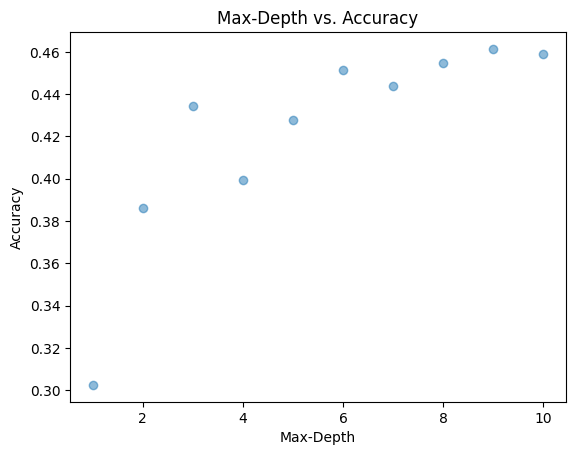

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df_accuracy['Max-Depth-Value'], df_accuracy['Accuracy'], alpha=.5)
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Max-Depth vs. Accuracy')
plt.savefig("best_k_ev.png")

## As shown by the graph, a max-depth of 9 will be used as it produces the most accurate results. Depths larger than 10 ma invoke overfitting of the data, so they will not be analyzed. 

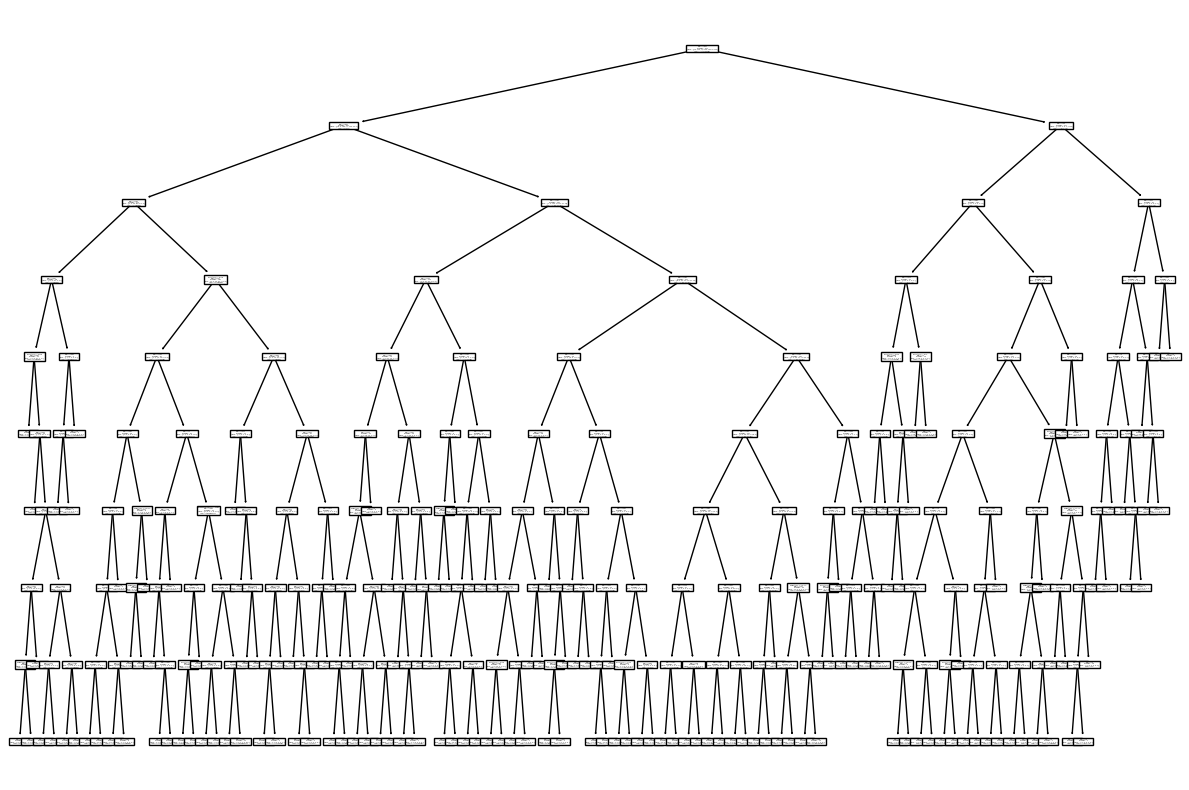

In [29]:
# Games played was removed from the featuer
max_depth = 9

# Scale normalizaiton was also performed before applying the algorithms
for feat in x_feat_list:
    df_final[feat] = df_final[feat] / df_final[feat].std()

x = df_final.loc[:, x_feat_list].values
y = df_final.loc[:, 'League'].values

# build decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# fit data
dec_tree_clf = dec_tree_clf.fit(x, y)

plt.figure()
plt.gcf().set_size_inches(15, 10)

# 'plot' decision tree
tree.plot_tree(dec_tree_clf, 
               feature_names=x_feat_list,
               class_names=dec_tree_clf.classes_);

# Perform cross validation and computation of the accuracy of the Decision Tree classifier.

In [30]:
n_splits = 10 # 10-fold Cross Validation
max_depth = 9

# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# initialize decision tree
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    dec_tree_clf = dec_tree_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = dec_tree_clf.predict(x_test)

Text(0.5, 0.98, 'max_depth=3 decision tree')

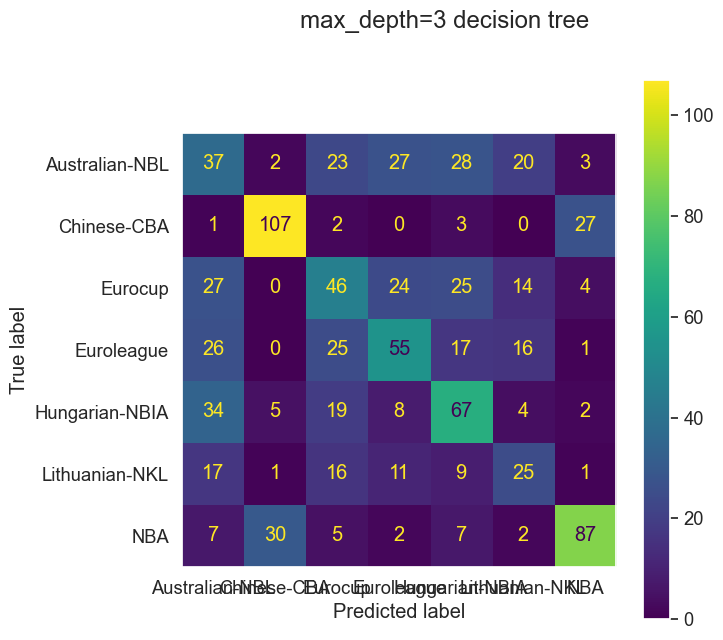

In [31]:
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

sns.set(font_scale=1.2)
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=3 decision tree')

In [32]:
print('Accuracy score of decision tree classifier:', accuracy_score(y, y_pred))

Accuracy score of decision tree classifier: 0.4613710554951034


# Since the accuracy was not that high, a Random Forest Classifier was also made.

In [33]:
# Games played was removed from the featuer
max_depth = 9

# Scale normalizaiton was also performed before applying the algorithms
for feat in x_feat_list:
    df_final[feat] = df_final[feat] / df_final[feat].std()

x = df_final.loc[:, x_feat_list].values
y = df_final.loc[:, 'League'].values

n_splits = 10

# initialize k fold
skfold = StratifiedKFold(n_splits=n_splits)

# initialize random forest
rf_clf = RandomForestClassifier(max_depth=max_depth, n_estimators=1000)

# initialize y_pred, stores predictions of y
y_pred = np.empty_like(y)

for train_idx, test_idx in skfold.split(x, y):
    # get training data
    x_train = x[train_idx, :]
    y_train = y[train_idx]
    
    # get test data    
    x_test = x[test_idx, :]
    
    # fit data
    rf_clf = rf_clf.fit(x_train, y_train)
    
    # estimate on test data
    y_pred[test_idx] = rf_clf.predict(x_test)

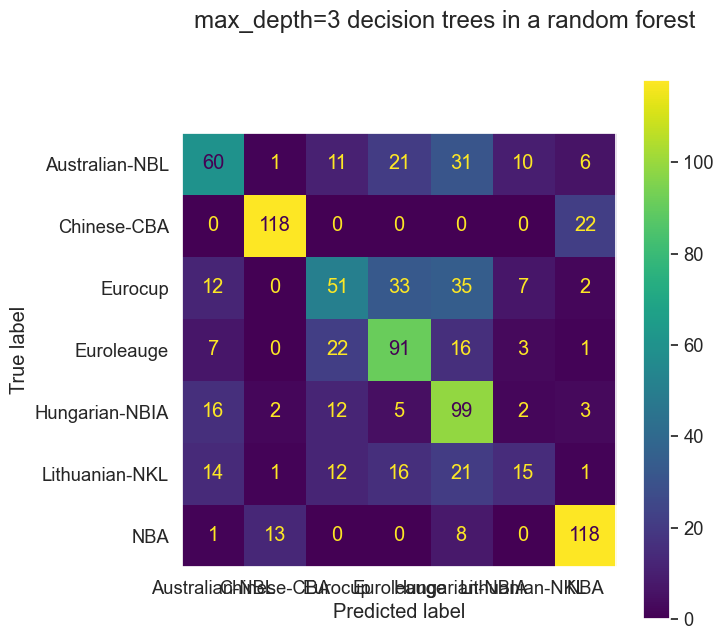

In [34]:
y_feat_list = np.array(['Australian-NBL', 'Chinese-CBA', 'Eurocup', 'Euroleauge', 'Hungarian-NBIA',
                        'Lithuanian-NKL', 'NBA'])

# build and plot confusion matrix
sns.set(font_scale=1.2)
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=y_feat_list)
conf_mat_disp.plot()
plt.gcf().set_size_inches(7, 7)
plt.grid(False)
plt.suptitle('max_depth=3 decision trees in a random forest');

In [35]:
print('Accuracy score of random forest classifier:', accuracy_score(y, y_pred))

Accuracy score of random forest classifier: 0.6006528835690969


# Lastly, comput the relative feature importance of the statistics:

In [36]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): str names of features
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        # sort features in decreasing importance
        ## not sure why, but .argsort had been doing decreasing by default, but this is now increasing
        ## This will now only work if you set the limit, since I flip it around in the next if block
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        # limit to the first limit feature
        feat_list = feat_list[-limit:]
        feat_import = feat_import[-limit:]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(Mean decrease in Gini across all Decision Trees)')
    plt.title('Feature Importance of Statistics for Random Forest Classifier')

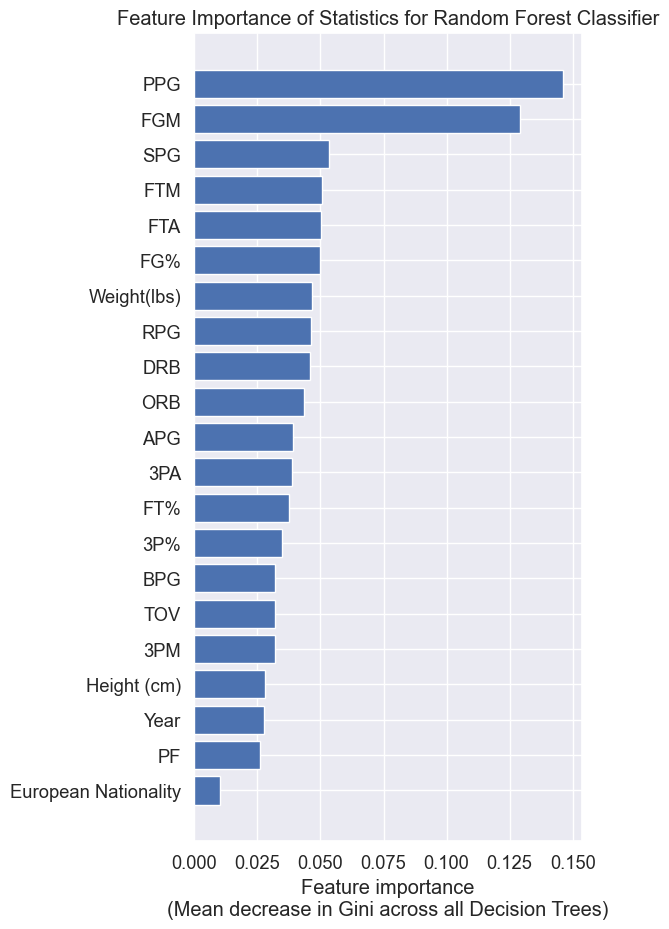

In [37]:
plot_feat_import(x_feat_list, rf_clf.feature_importances_)

# Next Machine Learning Algorithm to be used, KNN:
- Goal: distinguish the level of uniqueness (disimilariy) or overlap (similarity) between the average stastics of the top players in each league.

# First Step: determining the best k:

In [38]:
df_final.columns

Index(['Unnamed: 0', 'Team', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM',
       '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG',
       'BPG', 'TOV', 'PF', 'Year', 'European Nationality', 'Height (cm)',
       'Weight(lbs)', 'League'],
      dtype='object')

In [39]:
df_accuracy = pd.DataFrame()
from sklearn.neighbors import KNeighborsClassifier

In [40]:
def get_cv_acc_knn(x, y_true, k, n_splits=10):
    """gets the cross validation accuracy of K-NN on the dataset
    
    Args:
        x (array): an array/list of all the values that are in the x_feat_list in the dataframe at every row
        y_ture (array): an array/list of all the values of the drive type in the data frame
        k (int): the k value to be using for the KNeighborsClassifier object - determines how to calculate the
            k-nearest neighbors of each point in the data set
        n_splits (int): default value is 10, supplied to the StratifiedKFold object that folds the data set
    
    Returns:
        score (int): the computed accuracy of the accuracy of KNN applied to the data set
    """

    # initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # construction of kfold object
    kfold = StratifiedKFold(n_splits=10)

    # allocate an empty array to store predictions in
    y_pred = np.empty_like(y_true)

    for train_idx, test_idx in kfold.split(x, y_true):
        # build arrays which correspond to x, y train /test
        x_test = x[test_idx, :]
        x_train = x[train_idx, :]
        y_true_train = y_true[train_idx]

        # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
        knn_classifier.fit(x_train, y_true_train)

        # estimate each penguin's species
        y_pred[test_idx] = knn_classifier.predict(x_test)
        
    score = accuracy_score(y_true, y_pred)
    
    return score

In [41]:
from copy import copy
from collections import Counter

x_feat_list = ['GP', 'MPG', 'PPG', 'FGM', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG',
       'SPG', 'BPG', 'TOV', 'PF', 'Year', 'European Nationality',
       'Height (cm)', 'Weight(lbs)']
y_feat = 'League'

for feat in x_feat_list:
    df_final[feat] = df_final[feat] / df_final[feat].std()

x = df_final.loc[:, x_feat_list].values
y_true = df_final.loc[:, y_feat].values

for k in range(1, 21):
    accuracy_score_k = get_cv_acc_knn(x, y_true, k)
    list_of_data_for_specific_k = [k, accuracy_score_k] 
    s_temp = pd.Series(list_of_data_for_specific_k)
    df_accuracy = df_accuracy.append(s_temp, ignore_index=True)
    
df_accuracy = df_accuracy.rename(columns={0: 'K-Value', 1:'Accuracy'})
df_accuracy.head()

K-Value  Accuracy
0      1.0  0.662677
1      2.0  0.633297
2      3.0  0.647443
3      4.0  0.662677
4      5.0  0.649619

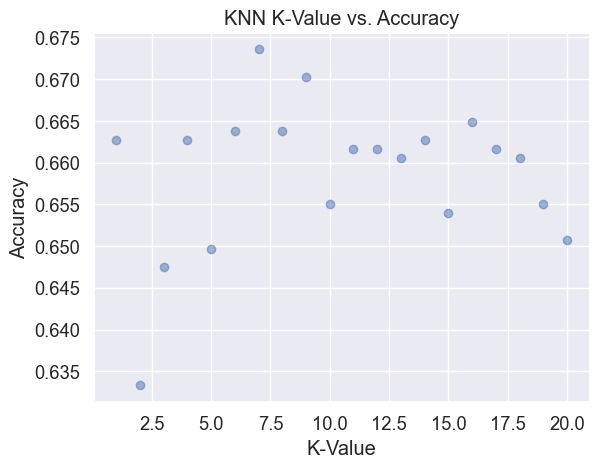

In [42]:
import matplotlib.pyplot as plt
plt.scatter(df_accuracy['K-Value'], df_accuracy['Accuracy'], alpha=.5)
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('KNN K-Value vs. Accuracy')
plt.savefig("best_k_ev.png")

# As shown/depicted by the graph, the best k (in the range from 1 to 20) is 7. After k = 15, it appears that the accracy is only declining, so no further testing into larger k values was conducted.

# Next, create the KNN classifier and view resutls. Perform 10-fold (stratified) cross validation.

In [43]:
def get_acc_sens_spec(y_true, y_pred, verbose=True):
    """ computes sensitivity & specificity (assumed binary inputs)

    Args:
        y_true (np.array): binary ground truth per trial
        y_pred (np.array): binary prediction per trial

    Returns:
        acc (float): accuracy
        sens (float): sensitivity
        spec (float): specificity
    """
    # line below stolen from sklearn confusion_matrix documentation
    tn, fp, fn, tp = confusion_matrix(y_true.astype(bool),
                                      y_pred.astype(bool),
                                      labels=(0, 8)).ravel()

    # compute sensitivity
    if tp + fn:
        sens = tp / (tp + fn)
    else:
        sens = np.nan

    # compute specificity
    if tn + fp:
        spec = tn / (tn + fp)
    else:
        spec = np.nan
        
    # compute acc
    acc = (tp + tn) / (tn + fp + fn + tp)

    return acc, sens, spec

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from copy import copy
from collections import Counter

k = 7 # the k-nearest neighbors
x_feat_list = ['GP', 'MPG', 'PPG', 'FGM', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG',
       'SPG', 'BPG', 'TOV', 'PF', 'Year', 'European Nationality',
       'Height (cm)', 'Weight(lbs)']
y_feat = 'League'

# extract data into numpy format (for sklearn)
x = df_final.loc[:, x_feat_list].values
y_true = df_final.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = StratifiedKFold(n_splits=10) # the k-folds

# allocate an empty array to store predictions in
y_pred = copy(y_true)

for train_idx, test_idx in kfold.split(x, y_true):
    # build arrays which correspond to x, y train /test
    x_test = x[test_idx, :]
    x_train = x[train_idx, :]
    y_true_train = y_true[train_idx]
    
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train, y_true_train)

    # estimate each pokemon's maintype
    y_pred[test_idx] = knn_classifier.predict(x_test)

Text(0.5, 1.0, 'KNN Results:')

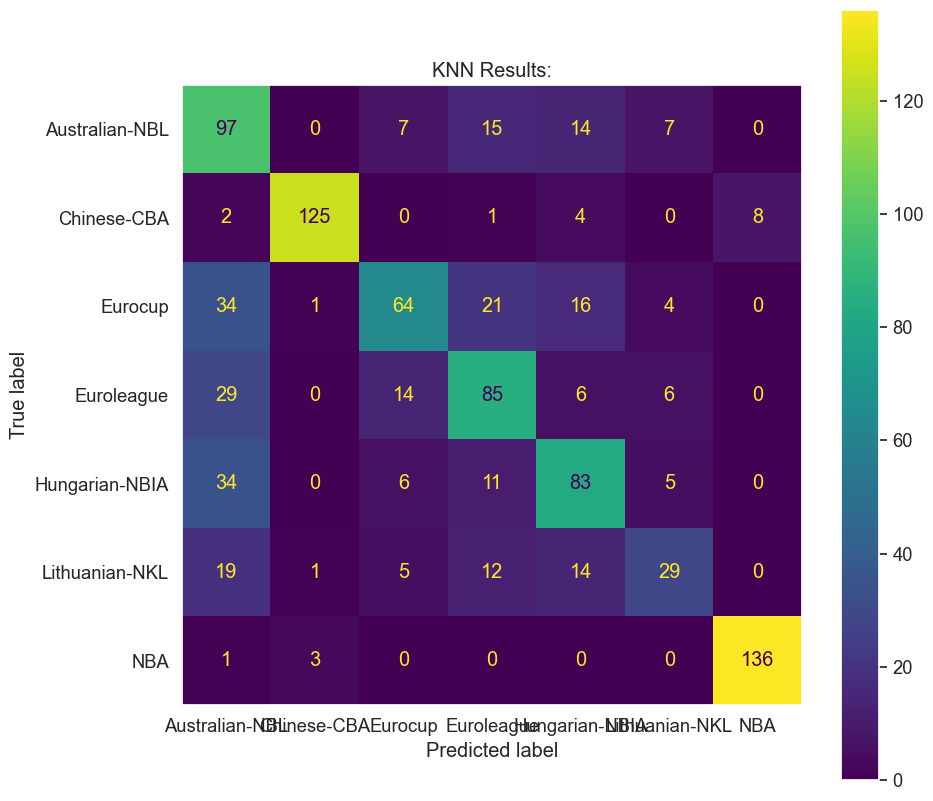

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(10, 10)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)
plt.title('KNN Results:')

# print(get_acc_sens_spec(y_true, y_pred))

In [46]:
# print('Accuracy score of KNN classifier with k = 7: ', accuracy_score(y_true, y_pred))

In [47]:
# get_acc_sens_spec(y_true, y_pred)

In [48]:
accuracy_score(y, y_pred)

0.6735582154515778

<a id='discussion'></a>
# 6. Discussion:

# `Interpretation of results from Decision Trees/Random Forests:`
- After removing GP (games played) from the set of attributes, the relative importance of each statistical category became more apparent. So, the computations made later on did not include GP in the x_feat_list.
- Creation of Decision Tree and Random Forest classifiers were made with max_depth = 9 after determination of the best accuracy socre was determining between max-depths 1 and 10.

- Note: values may slightly vary is the algorithms are run again when the Kernal is restarted. This is because cross validation and a degree of randomness is used (however, results should still be very similar).

#### Decision Tree (with cross validation) Performance, max-depth of 9:
- Accuracy Score: 45.8%

#### Random Forest (with corss validation) Performance, max-depth of 9:
- Accuracy Score: 59.5%

Since the accuracy score of the Random Forest classifier was much higher than that of the decision tree, this means that data was being `overfit` to the Decision Tree Classifier.

#### Confusion Matrix Results/Insights:
- Prediction of players for the NBA and Chinese-CBA are very high. Additionally, preditions for players in the Chinese-CBA are fairly are also relatively high. There seems to be lots of confusion for the classifier for predicting players for the European leagues (Eurocup, Euroleague, Hungarian-NBIA, and Lithuanian-NKL).

##### Discussion of relative feature importance:
- The chart shows that PPG (Points per game) and FGM (field goals made) are the 2 statistical categories that largely explain the differences between overall player statistics of the different leagues (this is explianed by the gini coefficients). The other attributes are not as comprable to the results as these 2 statistics; therefore, they are not as meaningful.

##### Reasons for differences in relative feature importance:
- Refereeing of games.
- Different defensive intensities across different leagues.
- Exact time of games may slightly vary (less time to accumulate more statistics).

##### Can we trust the results of the Decision Tree/Random Forest Classifier Resutls:
- `Maybe.` The accuracy score of the Random Forest Classifier was significatlky better than random guessing (which would yield (~ 14.28% vs. 59.5% yielded by the classifier). However, the model was unable to differentitate between players in the European International Leagues.

# `Interpretation of results from KNN:`
- NBA players are very distinguishable from players of other leagues. This is because the classifier was only confued on 6 occassions were is classified NBA players to other leagues. Otherwise, the other 134 players were classified correctely. Additionally, Chinese-CBA are also fily distinguishable. Leagues such as Lithunia contian players whose statistics largerly vary.
#### Based on the KNN classifier, their is around a 67.4% overall accuracy at predicting what league a player belongs to.
- This means that the KNN classifier is moderately better at classifying which league a player belongs to based on their statistics. This is fairly good, but it also shows that there is a fair amount of overlap between the various overall statistics of players in different leagues. This overalap primarily comes from the International leagues. 
- Their is little overalp between the NBA player classifification and international league classificiation because the reffering of games. Additionally, the exact time of games slighlty varies from league to league.

### Comparison of the results between Decision Trees/Random Forest and KNN Results:
- Since the accuracy score of KNN was higher than that of decision trees and random forests, it is the better classifier for the model.

### Reasons why both computed accuracy scores are low:
- There was lots of confusion seen between the various predictions based upon the statistics of players in the international leagues (specifically the European Leagues). However, this confusion was not seen in the prediction of players for the NBA, and to a lesser degree the Australian and Chineese leagues. This could be due to culutural differences, 'unwritten rules', and different play styles.

### Why was KNN more accurate (than Random Forests) by around 7%?
- The Random Forest classifier predicts on the data based upon simply just looking at the statistical attributes of players (up to a certain extent due to the use of a max-depth of 9). In KNN, comparison to other players are made based upon similarity to groups of other data points belonging to a certain league.

# Future Work:
- Predicting the performance of a player in another league.
- Better handling of data normalization related to differences in playing time and player usage rate across the different leagues.